In [55]:
import os
import matplotlib.pyplot as plt
import numpy as np

from ramsay.internal.ops import pytorch_ops
from ramsay.internal.ops.selector import get_default_framework_module as get_ops
from ramsay.internal.ops.selector import set_framework_module

from polya_mixture.datasets.femnist_dataset import _load_h5_into_dict

In [26]:
data_dir = './data/femnist'

train_h5_file_path = os.path.join(data_dir, 'fed_emnist_train.h5')
val_h5_file_path = os.path.join(data_dir, 'fed_emnist_test.h5')

In [27]:
set_framework_module(pytorch_ops)

In [28]:
train_user_id_to_data = _load_h5_into_dict(train_h5_file_path, digits_only=False, numpy_to_tensor=get_ops().to_tensor)
train_user_ids = list(train_user_id_to_data.keys())

In [29]:
len(train_user_ids)

3400

In [30]:
val_user_id_to_data = _load_h5_into_dict(val_h5_file_path, digits_only=False, numpy_to_tensor=get_ops().to_tensor)
val_user_ids = list(val_user_id_to_data.keys())

In [31]:
len(val_user_ids)

3400

In [32]:
train_user_ids[:10]

['f0000_14',
 'f0001_41',
 'f0005_26',
 'f0006_12',
 'f0008_45',
 'f0011_13',
 'f0014_19',
 'f0016_39',
 'f0017_07',
 'f0022_10']

In [52]:
set(train_user_ids).difference(val_user_ids)

set()

In [33]:
val_user_ids[:10]

['f0000_14',
 'f0001_41',
 'f0005_26',
 'f0006_12',
 'f0008_45',
 'f0011_13',
 'f0014_19',
 'f0016_39',
 'f0017_07',
 'f0022_10']

In [37]:
x = train_user_id_to_data['f0000_14']

In [59]:
np.linalg.norm((x[0][0] - y[0][0]).cpu().numpy().ravel(), ord=2)

2.9623914

In [41]:
y = val_user_id_to_data['f0000_14']

In [42]:
y[0].shape

torch.Size([39, 28, 28, 1])

# Distribution of user sizes

In [47]:
train_dataset_len = []
for k,v in train_user_id_to_data.items():
    train_dataset_len.append(len(v[0]))

In [48]:
val_dataset_len = []
for k,v in val_user_id_to_data.items():
    val_dataset_len.append(len(v[0]))

(array([  16.,   49.,  364., 1759.,  113.,  222.,  303.,  330.,  217.,
          27.]),
 array([ 16. ,  56.2,  96.4, 136.6, 176.8, 217. , 257.2, 297.4, 337.6,
        377.8, 418. ]),
 <BarContainer object of 10 artists>)

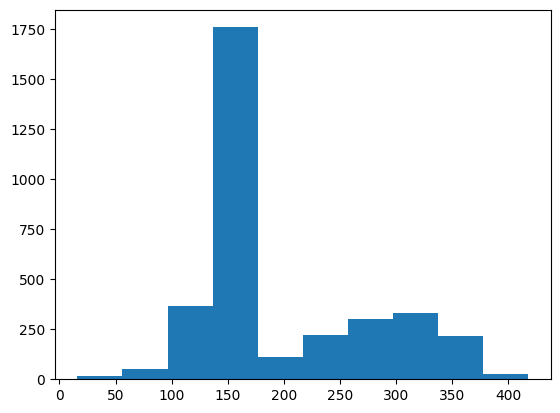

In [50]:
plt.hist(train_dataset_len)

(array([  16.,   40.,  507., 1625.,   98.,  241.,  271.,  375.,  195.,
          32.]),
 array([ 3. ,  7.4, 11.8, 16.2, 20.6, 25. , 29.4, 33.8, 38.2, 42.6, 47. ]),
 <BarContainer object of 10 artists>)

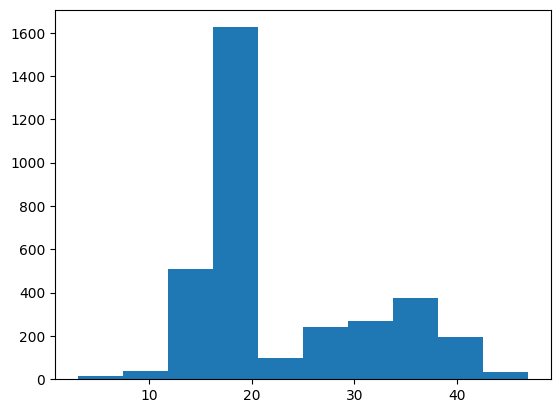

In [51]:
plt.hist(val_dataset_len)

Text(0, 0.5, 'Amount of data per user')

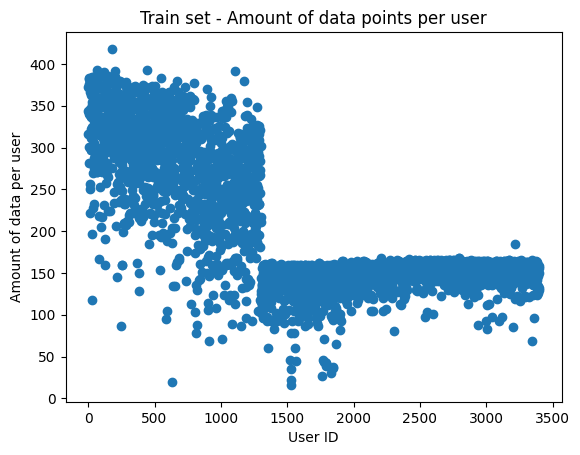

In [81]:
plt.plot(train_dataset_len, 'o')
plt.title('Train set - Amount of data points per user')
plt.xlabel('User ID')
plt.ylabel('Amount of data per user')

In [74]:
train_dataset_len[1302]

125

Text(0, 0.5, 'Amount of data per user')

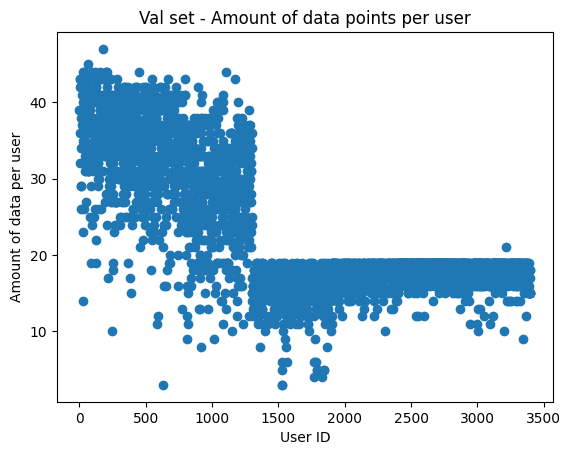

In [80]:
plt.plot(val_dataset_len, 'o')
plt.title('Val set - Amount of data points per user')
plt.xlabel('User ID')
plt.ylabel('Amount of data per user')

In [76]:
val_dataset_len[1300:1303]

[34, 24, 15]